In [128]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,mean_absolute_error,r2_score

In [2]:
pdata = pd.read_csv(r'F:\Code\Data\TrainingData\Auction Verification\data.csv')

In [31]:
print(pdata.info())
print(pdata.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB
None
       process.b1.capacity  process.b2.capacity  process.b3.capacity  \
count          2043.000000          2043.000000          2043.000000   
mean              1.000000             2.093979             1.883994   
std               0.816696             0.811269             0.

In [4]:
print(pdata.head(3))

   process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                    0                    0                    2   
1                    0                    0                    2   
2                    0                    0                    2   

   process.b4.capacity  property.price  property.product  property.winner  \
0                    1              59                 1                0   
1                    1              59                 2                0   
2                    1              59                 4                0   

   verification.result  verification.time  
0                False         163.316667  
1                False         200.860000  
2                False         154.888889  


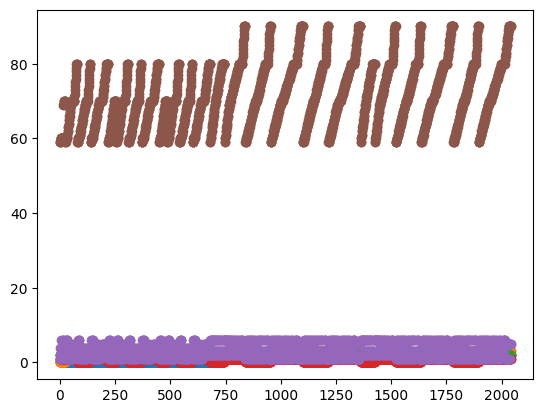

In [62]:
X_Label = ['process.b1.capacity','process.b2.capacity','process.b3.capacity','process.b4.capacity','property.product','property.price']
for i in X_Label[:]:
#     print(pdata[[i]])
    plt.scatter(np.arange(len(pdata[[i]])),pdata[i].ravel())
#     print(np.arange(len(pdata[[i]])).shape,pdata[i].ravel().shape)

In [69]:
st0 = np.ones_like(pdata['property.price'])
X = np.column_stack((st0,pdata[X_Label[:-1]].values))
Y = pdata['property.price']
X = np.mat(X)
Y = np.mat(Y).T
print(Y.shape)

(2043, 1)


In [71]:
theta = (X.T * X).I * X.T * Y

In [113]:
print(theta.shape)
print(theta)

(6, 1)
[[63.99329298]
 [ 2.52237117]
 [ 0.19506713]
 [ 2.14462558]
 [ 2.06168891]
 [-0.21624794]]


In [94]:
predict_y = np.asarray(X * theta)

2043 2043
MSE 6.255051010738639
R2 0.10337146278057929


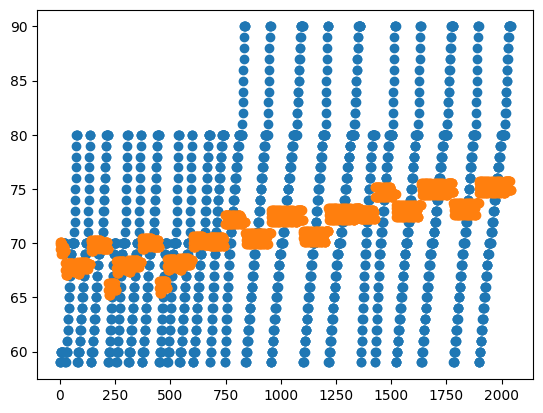

In [97]:
print(len(Y),len(predict_y))
np.arange(len(Y))
plt.scatter(np.arange(len(Y)),np.asarray(Y))
plt.scatter(np.arange(len(Y)),predict_y)
mes = mean_absolute_error(y_true=np.asarray(Y),y_pred=np.asarray(predict_y))
print('MSE',mes)
r2 = r2_score(y_true=np.asarray(Y),y_pred=np.asarray(predict_y))
print('R2',r2)

In [196]:
# 使用sklearn
LX = pdata.iloc[:,[0,1,2,3,5]]
LY = pdata.iloc[:,4]
poly = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)

In [197]:
xTrain,xTest,yTrain,yTest = train_test_split(LX,LY,test_size=0.1,random_state = 1)
poly.fit(xTrain)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)

In [198]:
# 多项式拓展 EX
x_train_poly = poly.transform(xTrain)
x_test_poly = poly.transform(xTest)

In [199]:
linear = LinearRegression(fit_intercept=True)
# linear.fit(xTrain,yTrain)
linear.fit(x_train_poly,yTrain)

LinearRegression()

In [200]:
# print(linear.coef_,linear.intercept_)

In [201]:
yPredict = linear.predict(x_train_poly)
print(linear.score(x_train_poly,yTrain))
print(linear.score(x_test_poly,yTest))
y_train_hat = linear.predict(x_train_poly)

0.12974834212565745
0.05916596354122172


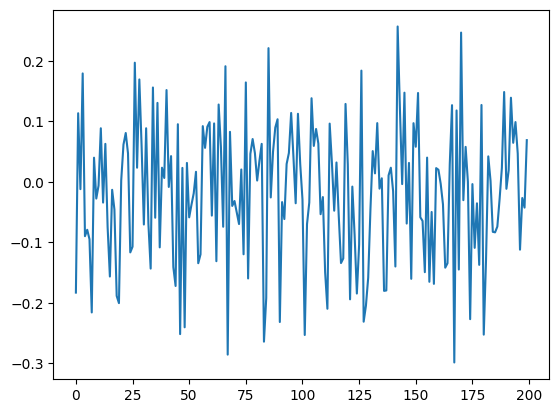

In [202]:
ld = 200
plt.plot(range(len(yPredict[:d])),(yTest[:d]-yPredict[:d])/yTest[:d])
# plt.plot(range(len(yTest[:d])),yTest[:d])